# Линейная регрессия

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Получение данных

Криминологов интересует влияние режимов наказания на уровень преступности. Это было изучено с использованием сводных данных по 47 штатам США за 1960 год. Набор данных содержит следующие столбцы:


*males* - процентная доля мужчин в возрасте 14-24 лет от общей численности населения штата <br>
*southern* - переменная показателя для южного штата <br>
*education* - среднее количество лет обучения в школе для населения в возрасте 25 лет и старше <br>
*police_expenditure_1960* - расходы на полицию на душу населения в 1960 году <br>
*police_expenditure_1959* - расходы на полицию на душу населения в 1959 году <br>
*labour_force* - коэффициент участия в рабочей силе гражданских городских мужчин в возрастной группе 14-24 года <br>
*males_per_females* - число мужчин на 100 женщин <br>
*population* - численность населения штата в 1960 году в сотнях тысяч человек <br>
*nonwhites* - процент небелых в населении <br>
*unemployed_14_24* - уровень безработицы среди городских мужчин в возрасте 14-24 лет <br>
*unemployed_35_39* - уровень безработицы среди городских мужчин в возрасте 35-39 лет <br>
*wealth* - средняя стоимость передаваемых активов или семейного дохода <br>
*income_inequality* - неравенство в доходах: процент семей, получающих менее половины среднего дохода <br>
*imprisonment_prob* - вероятность тюремного заключения: отношение количества судимостей к количеству правонарушений <br>
*prison_time* - среднее время в месяцах, которое правонарушители отбывали в государственных тюрьмах до своего первого освобождения <br>
*crime_rate* - уровень преступности: количество правонарушений на 100 000 населения в 1960 году <br>

In [56]:
df = pd.read_csv('uscrime.txt', delimiter='\t')

In [57]:
df.head()

,males,southern,education,police_expenditure_1960,police_expenditure_1959,labour_force,males_per_females,population,nonwhites,unemployed_14_24,unemployed_35_39,wealth,income_inequality,imprisonment_prob,prison_time,crime_rate
0,15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
1,14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
2,14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
3,13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
4,14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234


In [58]:
df.describe()

,males,southern,education,police_expenditure_1960,police_expenditure_1959,labour_force,males_per_females,population,nonwhites,unemployed_14_24,unemployed_35_39,wealth,income_inequality,imprisonment_prob,prison_time,crime_rate
count,47.000000,47.000000,47.00000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,13.857447,0.340426,10.56383,8.500000,8.023404,0.561191,98.302128,36.617021,10.112766,0.095468,3.397872,5253.829787,19.400000,0.047091,26.597921,905.085106
std,1.256763,0.478975,1.11870,2.971897,2.796132,0.040412,2.946737,38.071188,10.282882,0.018029,0.844545,964.909442,3.989606,0.022737,7.086895,386.762697
min,11.900000,0.000000,8.70000,4.500000,4.100000,0.480000,93.400000,3.000000,0.200000,0.070000,2.000000,2880.000000,12.600000,0.006900,12.199600,342.000000
25%,13.000000,0.000000,9.75000,6.250000,5.850000,0.530500,96.450000,10.000000,2.400000,0.080500,2.750000,4595.000000,16.550000,0.032701,21.600350,658.500000
50%,13.600000,0.000000,10.80000,7.800000,7.300000,0.560000,97.700000,25.000000,7.600000,0.092000,3.400000,5370.000000,17.600000,0.042100,25.800600,831.000000
75%,14.600000,1.000000,11.45000,10.450000,9.700000,0.593000,99.200000,41.500000,13.250000,0.104000,3.850000,5915.000000,22.750000,0.054450,30.450750,1057.500000
max,17.700000,1.000000,12.20000,16.600000,15.700000,0.641000,107.100000,168.000000,42.300000,0.142000,5.800000,6890.000000,27.600000,0.119804,44.000400,1993.000000


In [59]:
columns_names = df.columns.tolist()
columns_names

['males',
 'southern',
 'education',
 'police_expenditure_1960',
 'police_expenditure_1959',
 'labour_force',
 'males_per_females',
 'population',
 'nonwhites',
 'unemployed_14_24',
 'unemployed_35_39',
 'wealth',
 'income_inequality',
 'imprisonment_prob',
 'prison_time',
 'crime_rate']

## Формализация модели

Нужно проанализировать, сколько у нас зависимых признаков, и построить общую формулу уравнения линейной регрессии. Поэтому построим корреляционную таблицу, однако исключим признак *southern*, так как он категориальный.

In [60]:
columns_names.remove('southern')
X = df[columns_names]
correlation = X.corr()
correlation

,males,education,police_expenditure_1960,police_expenditure_1959,labour_force,males_per_females,population,nonwhites,unemployed_14_24,unemployed_35_39,wealth,income_inequality,imprisonment_prob,prison_time,crime_rate
males,1.000000,-0.530240,-0.505737,-0.513173,-0.160949,-0.028680,-0.280638,0.593198,-0.224381,-0.244843,-0.670055,0.639211,0.361116,0.114511,-0.089472
education,-0.530240,1.000000,0.482952,0.499410,0.561178,0.436915,-0.017227,-0.664882,0.018103,-0.215682,0.735997,-0.768658,-0.389923,-0.253974,0.322835
police_expenditure_1960,-0.505737,0.482952,1.000000,0.993586,0.121493,0.033760,0.526284,-0.213709,-0.043698,0.185093,0.787225,-0.630500,-0.473247,0.103358,0.687604
police_expenditure_1959,-0.513173,0.499410,0.993586,1.000000,0.106350,0.022843,0.513789,-0.218768,-0.051712,0.169224,0.794262,-0.648152,-0.473027,0.075627,0.666714
labour_force,-0.160949,0.561178,0.121493,0.106350,1.000000,0.513559,-0.123672,-0.341214,-0.229400,-0.420762,0.294632,-0.269886,-0.250086,-0.123640,0.188866
males_per_females,-0.028680,0.436915,0.033760,0.022843,0.513559,1.000000,-0.410628,-0.327305,0.351892,-0.018692,0.179609,-0.167089,-0.050858,-0.427697,0.213914
population,-0.280638,-0.017227,0.526284,0.513789,-0.123672,-0.410628,1.000000,0.095153,-0.038120,0.270422,0.308263,-0.126294,-0.347289,0.464210,0.337474
nonwhites,0.593198,-0.664882,-0.213709,-0.218768,-0.341214,-0.327305,0.095153,1.000000,-0.156450,0.080908,-0.590107,0.677313,0.428059,0.230398,0.032599
unemployed_14_24,-0.224381,0.018103,-0.043698,-0.051712,-0.229400,0.351892,-0.038120,-0.156450,1.000000,0.745925,0.044857,-0.063832,-0.007469,-0.169853,-0.050478
unemployed_35_39,-0.244843,-0.215682,0.185093,0.169224,-0.420762,-0.018692,0.270422,0.080908,0.745925,1.000000,0.092072,0.015678,-0.061592,0.101358,0.177321


Text(0.5, 1.0, 'Correlation between different features')

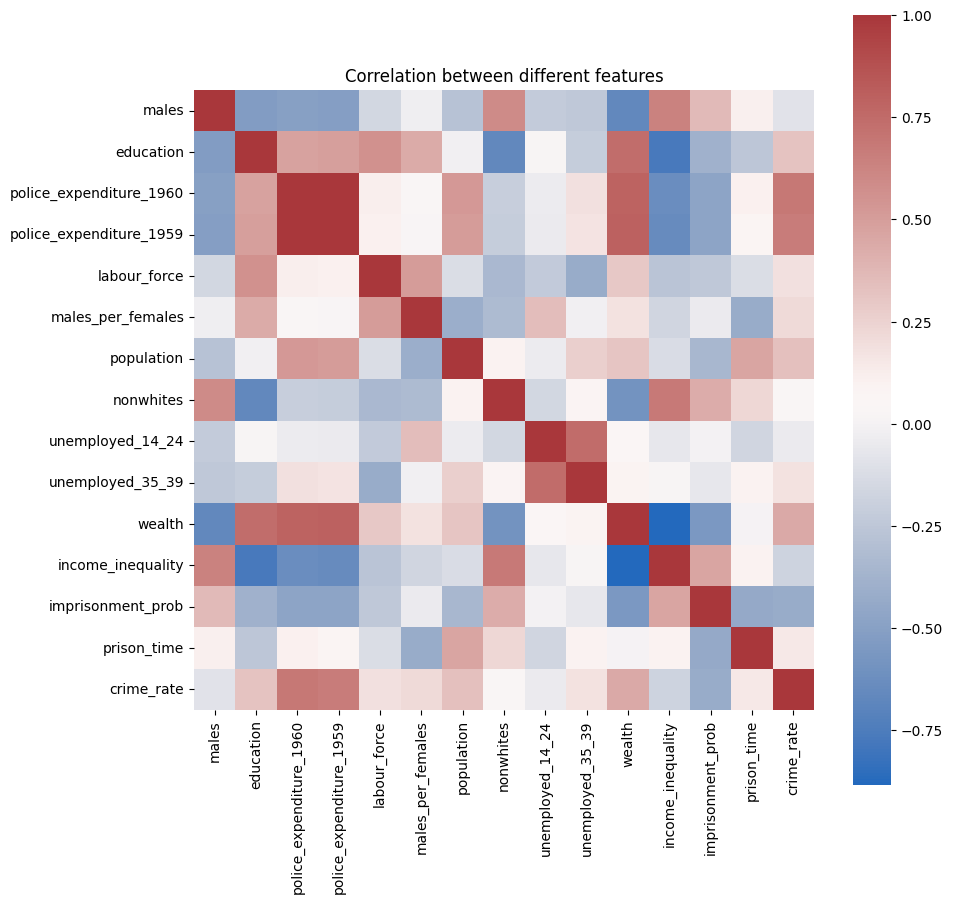

In [61]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, vmax=1, square=True, annot=False, cmap='vlag')
plt.title('Correlation between different features')

Мы можем видеть, что *police_expenditure_1960* и *police_expenditure_1959* имеют высокую корреляцию друг с другом. Это условие не является идеальным для линейной регрессии, поскольку одним из предположений, при построении модели линейной регрессии, является отсутствие мультиколлинеарности, т.е. нет предикторных переменных, которые сильно коррелировали бы друг с другом. Основываясь на этом результате, я объединю эти две переменные в один столбец *police_expenditure*, который содержит данные о расходах полиции в среднем за эти 2 года.

In [62]:
df = df.assign(police_expenditure=lambda x: (x['police_expenditure_1960'] + x['police_expenditure_1959']) / 2).drop(['police_expenditure_1960', 'police_expenditure_1959'], axis=1)

In [63]:
df.head()

,males,southern,education,labour_force,males_per_females,population,nonwhites,unemployed_14_24,unemployed_35_39,wealth,income_inequality,imprisonment_prob,prison_time,crime_rate,police_expenditure
0,15.1,1,9.1,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791,5.70
1,14.3,0,11.3,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635,9.90
2,14.2,1,8.9,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578,4.45
3,13.6,0,12.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969,14.50
4,14.1,0,12.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234,10.50


## Идентификация модели

### Парная линейная регрессия

Для начала построим парную линейную регрессию. Тут важно иметь предикторную переменную, которая имеет высокую линейную связь с целевыми переменными. Основываясь на корреляционной матрице, я буду использовать police_expenditure в качестве моей предикторной переменной. Перед построением модели я проверю, нет ли каких-либо отклонений от наших данных.

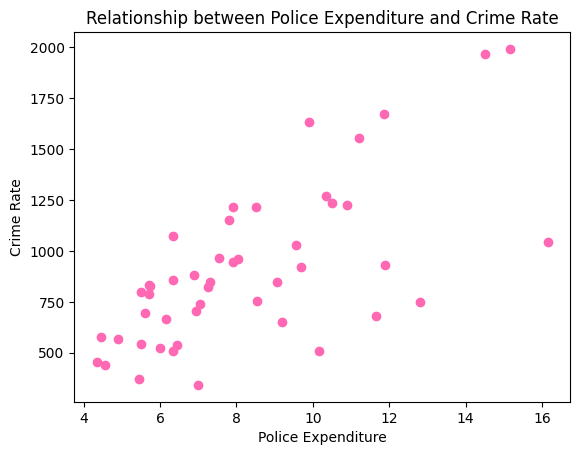

In [64]:
plt.scatter(df['police_expenditure'], df['crime_rate'], color='hotpink')
plt.xlabel('Police Expenditure')
plt.ylabel('Crime Rate')
plt.title('Relationship between Police Expenditure and Crime Rate')
plt.show()

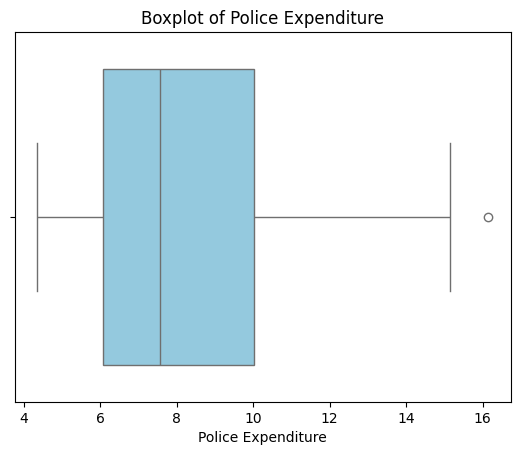

In [65]:
sns.boxplot(x=df['police_expenditure'], color='skyblue')
plt.xlabel('Police Expenditure')
plt.title('Boxplot of Police Expenditure')
plt.show()

Судя по диаграмме рассеяния, в наших данных police_expenditure есть одно отклонение. Удалим его, потому что оно оказывает большое влияние на  модель.

In [66]:
df = df.drop(df[df['police_expenditure'] > 16].index)

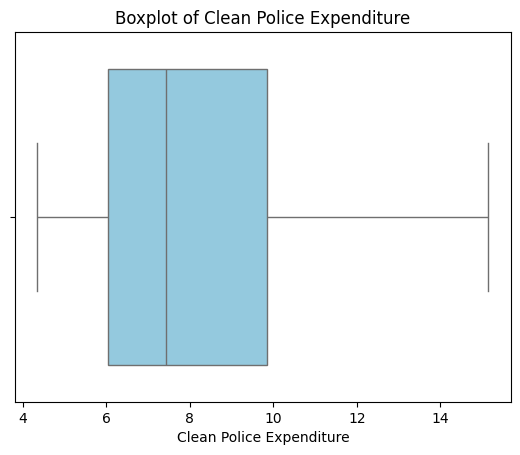

In [67]:
sns.boxplot(x=df['police_expenditure'], color='skyblue')
plt.xlabel('Clean Police Expenditure')
plt.title('Boxplot of Clean Police Expenditure')
plt.show()

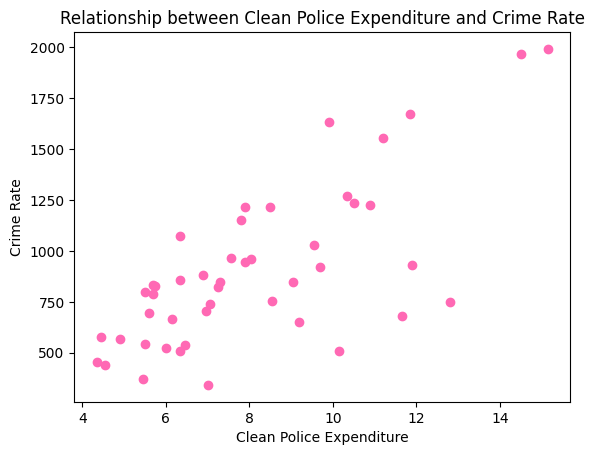

In [68]:
plt.scatter(df['police_expenditure'], df['crime_rate'], color='hotpink')
plt.xlabel('Clean Police Expenditure')
plt.ylabel('Crime Rate')
plt.title('Relationship between Clean Police Expenditure and Crime Rate')
plt.show()

In [69]:
X_train, X_test, y_train, y_test = train_test_split(df['police_expenditure'].values.reshape(-1, 1), df['crime_rate'], test_size=0.2, random_state=42)

In [70]:
model = LinearRegression()
model.fit(X_train, y_train)

print(f'crime_rate = {model.intercept_} + {model.coef_[0]} * police_expenditure')

crime_rate = 198.12328322759447 + 86.49154021893939 * police_expenditure


Итого при каждом увеличении расходов на полицию на 1 единицу за последние 2 года в среднем уровень преступности будет увеличиваться примерно в 86.49154 раза по сравнению с расходами на полицию.



In [71]:
score = model.score(X_test, y_test)

print(f'R^2 = {score}')

R^2 = 0.6157930793873043


Значение R-квадрата показывает нам, насколько хорошо наша модель описывает наши данные. Он измеряет степень, в которой отклонение в нашей целевой переменной (crime_rate) может быть объяснено предикторными переменными. По мере увеличения числа предикторных переменных значение R-квадрата нашей модели также будет увеличиваться, поскольку оно включает новую достоверную информацию, а также вносимый шум с помощью этих дополнительных переменных. Из-за этого лучше оценить скорректированный R-квадрат нашей модели. Скорректированный R-квадрат не увеличивается так, как обычный множественный R-квадрат, поскольку он скорректирован с учетом количества переменных-предикторов в нашей модели. Он увеличивается только тогда, когда новая переменная действительно приводит к лучшему прогнозированию.


Несмотря на это, простая линейная модель имеет скорректированный R-квадрат, равный всего 0.615793. Улучшения можно добиться, добавив в модель больше данных / переменных. Поскольку у меня есть только этот набор данных, я попытаюсь добавить больше переменных и использовать множественную линейную регрессию для этого случая.

### Множественная линейная регрессия

При построении множественной линейной регрессии надо сначала выбрать набор признаков, которые влияют на целевую переменную и не корреллируют между собой.

Text(0.5, 1.0, 'Correlation between different features')

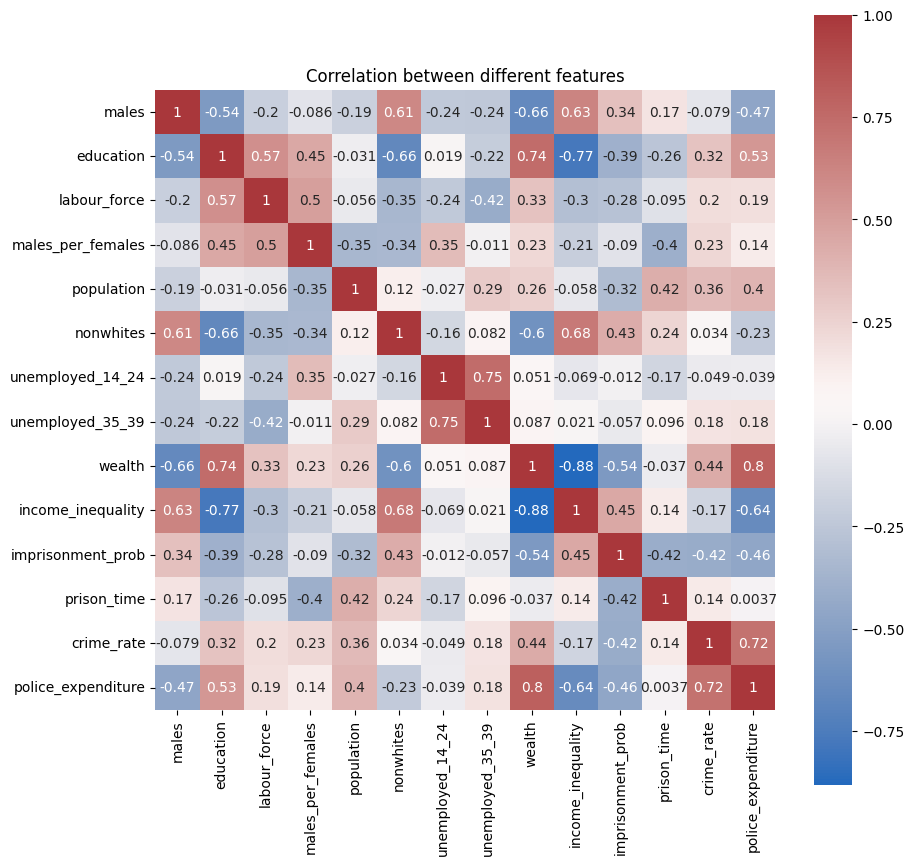

In [72]:
columns_names = df.columns.tolist()
columns_names.remove('southern')

X = df[columns_names]
correlation = X.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='vlag')
plt.title('Correlation between different features')

In [73]:
features = ['income_inequality', 'population', 'imprisonment_prob', 'police_expenditure']

In [74]:
X = df[features]
y = df['crime_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
model = LinearRegression()
model.fit(X, y)

print(model.intercept_, *model.coef_)

-1190.1889224011638 57.88011049146307 -1.0544999987772457 -4421.267022091476 149.61899349549938


In [76]:
score = model.score(X_test, y_test)

print(f'R^2 = {score}')

R^2 = 0.7902406359473212


Если сравнивать парную линейную регрессию с множественной линейной регрессии, то увидим, что множественная линейная регрессия дала лучший скорректированный R-квадрат, равный 0.79024, по сравнению с предыдущим значением. 

## Диагностика модели

### Линейность

Это предположение уже проверялось перед построением модели с использованием корреляционной таблицы.

### Нормальность

In [77]:
residuals = y_train - model.predict(X_train)

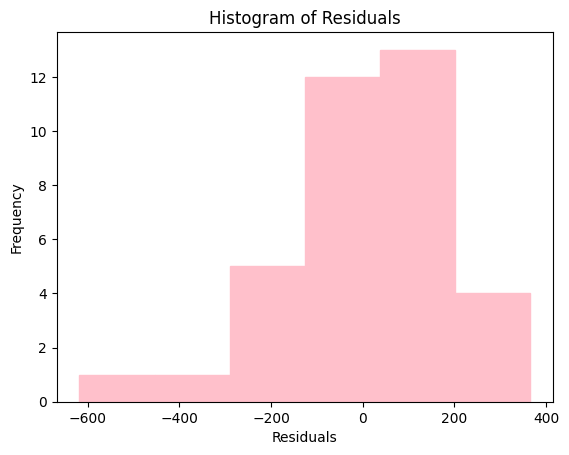

In [78]:
plt.hist(residuals, bins=6, edgecolor='pink', color='pink')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

In [79]:
stat, p_value = shapiro(residuals)
print('Shapiro-Wilk test p-value:', p_value)

Shapiro-Wilk test p-value: 0.0788988471031189


*p-value > 0,05* <br>
Этот результат означает, что остатки нашей модели распределены нормально, поэтому наша модель будет иметь ошибку, близкую к среднему значению.

### Гетероскедастичность

In [80]:
X_train_const = sm.add_constant(X_train)

_, p_value, _, _ = het_breuschpagan(residuals, X_train_const)
print('Breusch-Pagan test p-value:', p_value)

Breusch-Pagan test p-value: 0.1242709674965469


*p-value > 0,05* <br>
Это означает, что в остатках нашей модели нет закономерности, которая не могла бы быть зафиксирована нашей моделью.

### Мультиколлинеарность

In [81]:
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

for i in range(len(vif)):
    print(f'{X_train.columns[i]}: {vif[i]}')

income_inequality: 12.726051667107646
population: 2.832963053381139
imprisonment_prob: 6.84877473571548
police_expenditure: 6.690573351454496


Не все признаки имеют *VIF* меньше 10, один имеет чуть больше 10, однаком в данном случае это можно аргументировать малым размером выборки.

## Выводы

Итого сразу видно, что множественная линейная регрессия справляется со своей задачей лучше, чем парная. Однако для того, чтобы ее построить, нужно очень хорошо проанализировать признаки. В случае этого набора данных, точность не столь большая, так как его размерность очень маленькая, всего 47 наборов данных, а для таких анализов нужно иметь намного больше, чтобы точно не ошибиться. Также при формировании набора данных, нужно выделять признаки, явно не зависящие от других. 